In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_Wc8LBpr.csv")
test_df = pd.read_csv("test_VsU9xXK.csv")

In [3]:
train_df.head(15)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3


In [4]:
train_df.info()
print("-----------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [5]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]
# 197495 - 15% of Train
# 13109 - 15% of Test

,Train,Test
Type_of_Cab,20210,13158.0
Customer_Since_Months,5920,3966.0
Life_Style_Index,20193,13327.0
Confidence_Life_Style_Index,20193,13327.0
Var1,71030,46789.0


In [6]:
train_df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


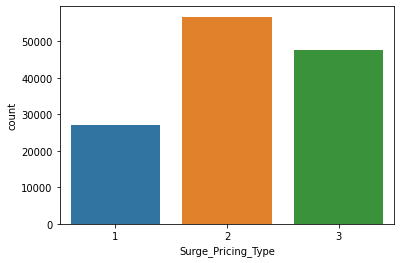

In [7]:
sns.countplot(x='Surge_Pricing_Type', data=train_df)

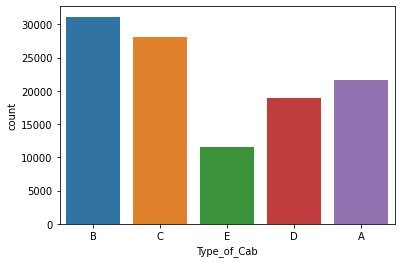

In [8]:
sns.countplot(x='Type_of_Cab', data=train_df)

In [9]:
train_df['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

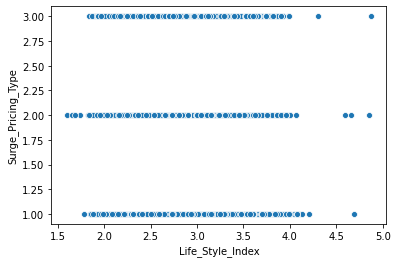

In [10]:
sns.scatterplot(x='Life_Style_Index', y='Surge_Pricing_Type', data = train_df)

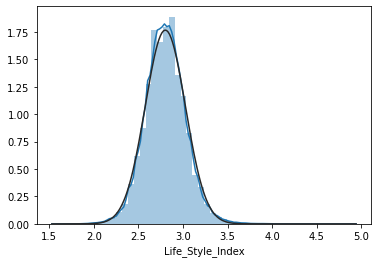

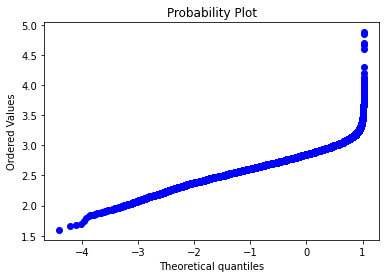

In [11]:
sns.distplot(train_df['Life_Style_Index'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Life_Style_Index'], plot=plt)

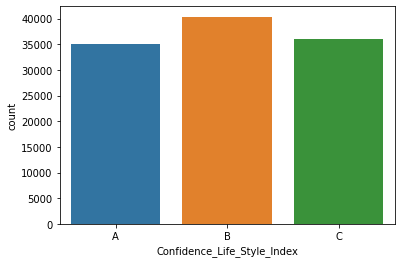

In [12]:
sns.countplot(x='Confidence_Life_Style_Index', data=train_df)

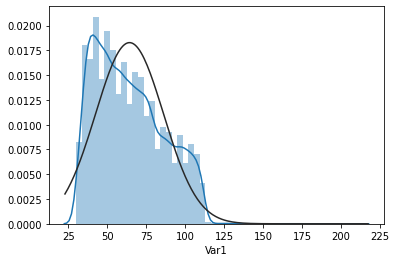

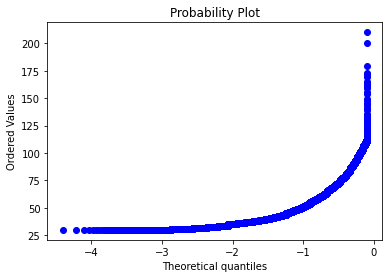

In [13]:
sns.distplot(train_df['Var1'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Var1'], plot=plt)

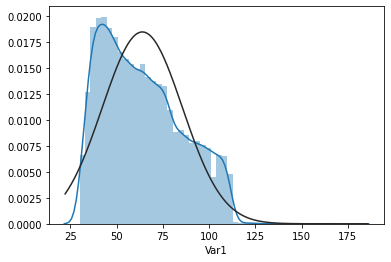

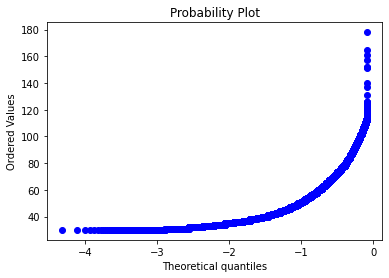

In [20]:
sns.distplot(test_df['Var1'], fit=norm)
fig = plt.figure()
res = stats.probplot(test_df['Var1'], plot=plt)

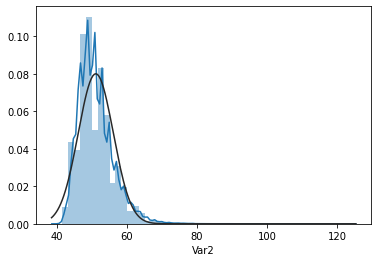

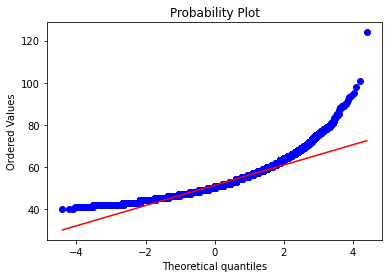

In [14]:
sns.distplot(train_df['Var2'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Var2'], plot=plt)

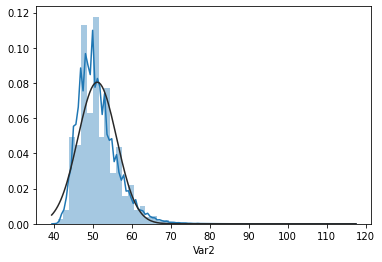

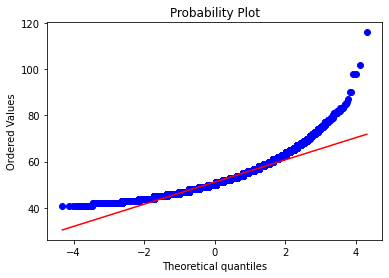

In [21]:
sns.distplot(test_df['Var2'], fit=norm)
fig = plt.figure()
res = stats.probplot(test_df['Var2'], plot=plt)

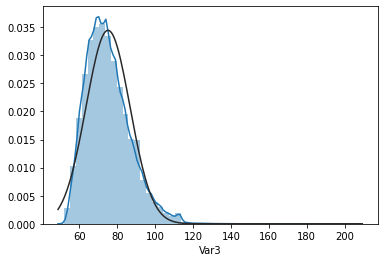

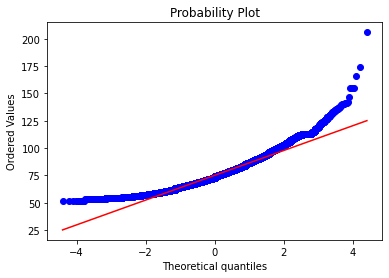

In [15]:
sns.distplot(train_df['Var3'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Var3'], plot=plt)

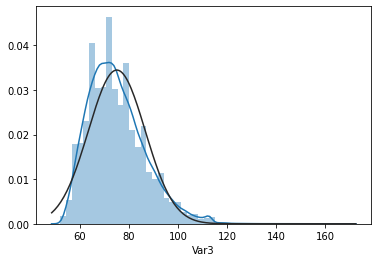

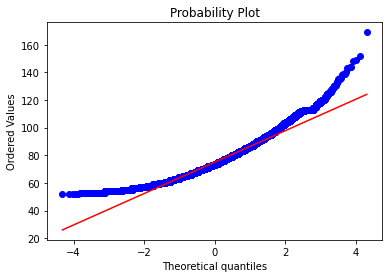

In [22]:
sns.distplot(test_df['Var3'], fit=norm)
fig = plt.figure()
res = stats.probplot(test_df['Var3'], plot=plt)

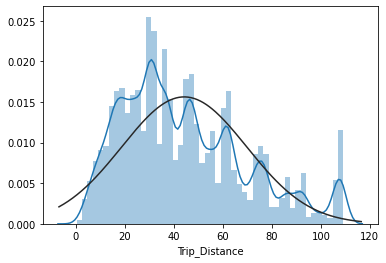

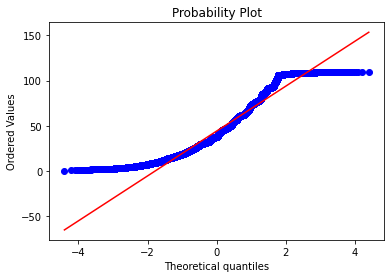

In [16]:
sns.distplot(train_df['Trip_Distance'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Trip_Distance'], plot=plt)

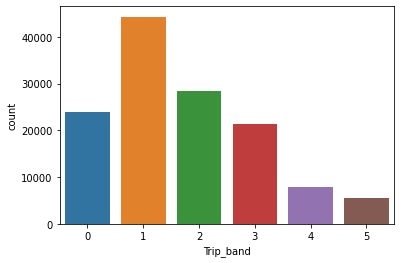

In [3]:
train_df['Trip_band']=0
train_df.loc[train_df['Trip_Distance']<=20,'Trip_band']=0
train_df.loc[(train_df['Trip_Distance']>20)&(train_df['Trip_Distance']<=40),'Trip_band']=1
train_df.loc[(train_df['Trip_Distance']>40)&(train_df['Trip_Distance']<=60),'Trip_band']=2
train_df.loc[(train_df['Trip_Distance']>60)&(train_df['Trip_Distance']<=80),'Trip_band']=3
train_df.loc[(train_df['Trip_Distance']>80)&(train_df['Trip_Distance']<=100),'Trip_band']=4
train_df.loc[train_df['Trip_Distance']>100,'Trip_band']=5
sns.countplot(x='Trip_band', data=train_df)

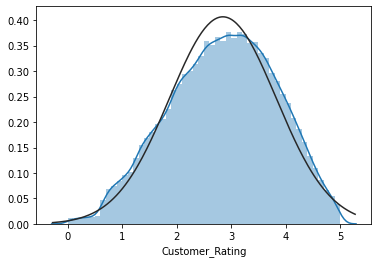

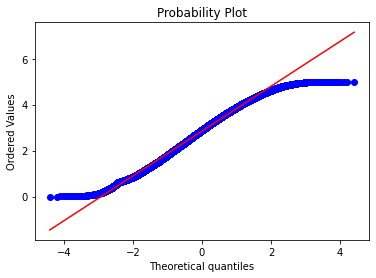

In [18]:
sns.distplot(train_df['Customer_Rating'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Customer_Rating'], plot=plt)

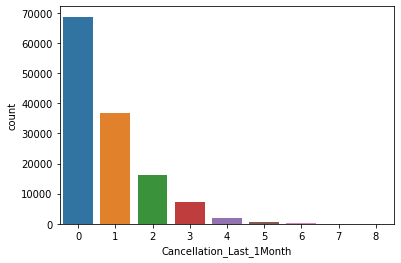

In [19]:
sns.countplot(train_df['Cancellation_Last_1Month'])

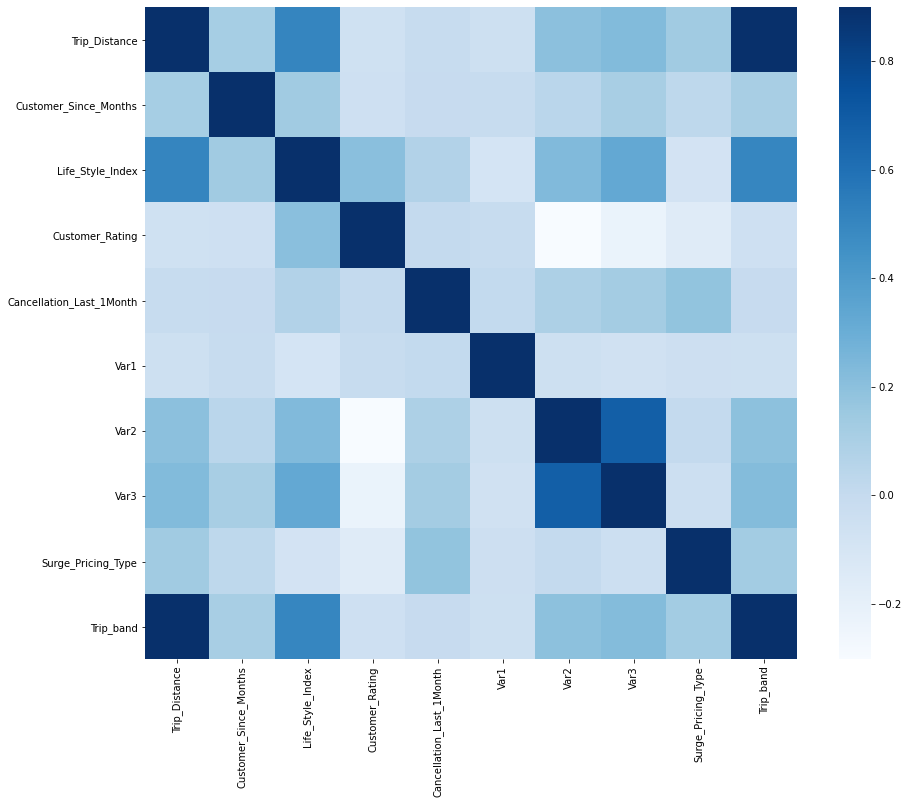

In [23]:
corr = train_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [25]:
train_df.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Trip_band
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2,0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2,1
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2,2
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3,0
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2,1
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2,0
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2,5
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3,5


In [26]:
train_df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Trip_band
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747,1.709377
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164,1.326931
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000,0.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000,1.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000,1.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000,5.000000


In [36]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]
# 19749 - 15% of Train
# 13109 - 15% of Test

,Train,Test
Type_of_Cab,0.0,13158.0
Customer_Since_Months,0.0,3966.0
Life_Style_Index,0.0,13327.0
Confidence_Life_Style_Index,0.0,13327.0
Var1,NaN,46789.0


In [4]:
train_df['Type_of_Cab'] = train_df['Type_of_Cab'].replace(np.nan, 'Unknown', regex=True)
train_df['Confidence_Life_Style_Index'] = train_df['Confidence_Life_Style_Index'].replace(np.nan, 'Unknown', regex=True)
train_df['Life_Style_Index'].fillna((train_df['Life_Style_Index'].mean()), inplace=True)
train_df = train_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [5]:
train_df.drop(['Var1'],axis=1,inplace=True)

In [6]:
train_df.shape

(131662, 14)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [40]:
train_df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,Trip_band
0,0,6.77,1,1.0,2.427690,0,0,3.90500,0,46,60,0,2,0
1,1,29.47,1,10.0,2.782450,1,0,3.45000,0,56,78,1,2,1
2,2,41.58,5,10.0,2.802064,3,4,3.50125,2,56,77,1,2,2
3,3,61.56,2,10.0,2.802064,3,0,3.45375,0,52,74,1,3,3
4,4,54.95,2,10.0,3.034530,1,0,3.40250,4,49,102,1,2,2


In [8]:
train_df.iloc[:,0]=label_x.fit_transform(train_df.iloc[:,0])
train_df.iloc[:,2]=label_x.fit_transform(train_df.iloc[:,2])
train_df.iloc[:,5]=label_x.fit_transform(train_df.iloc[:,5])
train_df.iloc[:,6]=label_x.fit_transform(train_df.iloc[:,6])
train_df.iloc[:,11]=label_x.fit_transform(train_df.iloc[:,11])

In [9]:
X=np.zeros((131662, 14))
y=np.zeros((131662, 1))
X=train_df.iloc[:,0:]
y=train_df['Surge_Pricing_Type']
X.drop(['Surge_Pricing_Type'],axis=1,inplace=True)

In [10]:
X.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Trip_band
0,0,6.77,1,1.0,2.427690,0,0,3.90500,0,46,60,0,0
1,1,29.47,1,10.0,2.782450,1,0,3.45000,0,56,78,1,1
2,2,41.58,5,10.0,2.802064,3,4,3.50125,2,56,77,1,2
3,3,61.56,2,10.0,2.802064,3,0,3.45375,0,52,74,1,3
4,4,54.95,2,10.0,3.034530,1,0,3.40250,4,49,102,1,2
5,5,19.06,4,10.0,2.802064,3,0,2.59750,1,63,91,1,0
6,6,29.72,4,10.0,2.839580,2,1,2.97500,1,50,75,1,1
7,7,18.44,1,2.0,2.818710,1,0,3.58250,0,46,63,1,0
8,8,106.80,2,3.0,2.802064,3,0,3.14625,0,58,92,1,5
9,9,107.19,3,5.0,3.044670,1,0,2.44375,1,58,83,1,5


In [43]:
y

0         2
1         2
2         2
3         3
4         2
         ..
131657    3
131658    2
131659    2
131660    2
131661    1
Name: Surge_Pricing_Type, Length: 125742, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape

(92163, 13)

In [12]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

#train = pd.read('train.csv')
class_weights = get_class_weights(y_train)
print(class_weights)

{3: 1.18, 1: 2.06, 2: 1.0}


In [13]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [14]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [15]:
 #A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [16]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [17]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X,y), scoring = 'accuracy', verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  6.4min finished



 Time taken: 0 hours 9 minutes and 5.6 seconds.


In [18]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-02.csv', index=False)


 All results:
{'mean_fit_time': array([ 67.29305808, 111.97144389, 104.0666422 ,  75.75566554,
        95.83521589]), 'std_fit_time': array([0.12369158, 1.21841692, 0.76088239, 1.3301824 , 0.64508601]), 'mean_score_time': array([1.76569637, 4.31321613, 3.98840213, 4.81879687, 2.7625463 ]), 'std_score_time': array([0.01236548, 0.08971778, 0.19761671, 1.02890985, 0.04417783]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?

In [47]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [20]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric= 'merror' , eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.408466
[1]	validation_0-merror:0.315097
[2]	validation_0-merror:0.3114
[3]	validation_0-merror:0.310691
[4]	validation_0-merror:0.310615
[5]	validation_0-merror:0.311704
[6]	validation_0-merror:0.311577
[7]	validation_0-merror:0.310312
[8]	validation_0-merror:0.310388
[9]	validation_0-merror:0.310413
[10]	validation_0-merror:0.311426
[11]	validation_0-merror:0.310818
[12]	validation_0-merror:0.310464
[13]	validation_0-merror:0.311198
[14]	validation_0-merror:0.311552
[15]	validation_0-merror:0.311577
[16]	validation_0-merror:0.311755
[17]	validation_0-merror:0.311577
[18]	validation_0-merror:0.311729
[19]	validation_0-merror:0.312134
[20]	validation_0-merror:0.312388
[21]	validation_0-merror:0.311603
[22]	validation_0-merror:0.311856
[23]	validation_0-merror:0.312261
[24]	validation_0-merror:0.31178
[25]	validation_0-merror:0.31178
[26]	validation_0-merror:0.31221
[27]	validation_0-merror:0.312438
[28]	validation_0-merror:0.312489
[29]	validation_0-merror:0.31

[239]	validation_0-merror:0.304793
[240]	validation_0-merror:0.304843
[241]	validation_0-merror:0.304843
[242]	validation_0-merror:0.304868
[243]	validation_0-merror:0.304843
[244]	validation_0-merror:0.304767
[245]	validation_0-merror:0.304691
[246]	validation_0-merror:0.304742
[247]	validation_0-merror:0.304666
[248]	validation_0-merror:0.304539
[249]	validation_0-merror:0.304539
[250]	validation_0-merror:0.304641
[251]	validation_0-merror:0.304691
[252]	validation_0-merror:0.304868
[253]	validation_0-merror:0.304742
[254]	validation_0-merror:0.304641
[255]	validation_0-merror:0.304666
[256]	validation_0-merror:0.304717
[257]	validation_0-merror:0.304615
[258]	validation_0-merror:0.304615
[259]	validation_0-merror:0.304514
[260]	validation_0-merror:0.304387
[261]	validation_0-merror:0.304463
[262]	validation_0-merror:0.304236
[263]	validation_0-merror:0.304337
[264]	validation_0-merror:0.304337
[265]	validation_0-merror:0.304387
[266]	validation_0-merror:0.304261
[267]	validation_0-m

[474]	validation_0-merror:0.30221
[475]	validation_0-merror:0.30216
[476]	validation_0-merror:0.302109
[477]	validation_0-merror:0.302185
[478]	validation_0-merror:0.30221
[479]	validation_0-merror:0.301906
[480]	validation_0-merror:0.302008
[481]	validation_0-merror:0.302033
[482]	validation_0-merror:0.302084
[483]	validation_0-merror:0.302311
[484]	validation_0-merror:0.302109
[485]	validation_0-merror:0.302033
[486]	validation_0-merror:0.302109
[487]	validation_0-merror:0.30216
[488]	validation_0-merror:0.302134
[489]	validation_0-merror:0.302033
[490]	validation_0-merror:0.302084
[491]	validation_0-merror:0.302058
[492]	validation_0-merror:0.302134
[493]	validation_0-merror:0.302084
[494]	validation_0-merror:0.302058
[495]	validation_0-merror:0.302286
[496]	validation_0-merror:0.302261
[497]	validation_0-merror:0.302033
[498]	validation_0-merror:0.302058
[499]	validation_0-merror:0.302134
[500]	validation_0-merror:0.302185
[501]	validation_0-merror:0.302261
[502]	validation_0-merro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.54      0.63      8072
           2       0.68      0.79      0.73     17239
           3       0.71      0.67      0.69     14188

    accuracy                           0.70     39499
   macro avg       0.71      0.67      0.68     39499
weighted avg       0.70      0.70      0.69     39499



In [24]:
test_df['Trip_band']=0
test_df.loc[test_df['Trip_Distance']<=20,'Trip_band']=0
test_df.loc[(test_df['Trip_Distance']>20)&(test_df['Trip_Distance']<=40),'Trip_band']=1
test_df.loc[(test_df['Trip_Distance']>40)&(test_df['Trip_Distance']<=60),'Trip_band']=2
test_df.loc[(test_df['Trip_Distance']>60)&(test_df['Trip_Distance']<=80),'Trip_band']=3
test_df.loc[(test_df['Trip_Distance']>80)&(test_df['Trip_Distance']<=100),'Trip_band']=4
test_df.loc[test_df['Trip_Distance']>100,'Trip_band']=5

test_df['Type_of_Cab'] = test_df['Type_of_Cab'].replace(np.nan, 'Unknown', regex=True)
test_df['Confidence_Life_Style_Index'] = test_df['Confidence_Life_Style_Index'].replace(np.nan, 'Unknown', regex=True)
test_df['Life_Style_Index'].fillna((test_df['Life_Style_Index'].mean()), inplace=True)

test_df.drop(['Var1'],axis=1,inplace=True)

test_df.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Trip_band
0,T0005689459,9.44,A,10.0,2.574380,A,B,3.68000,2,46,63,Male,0
1,T0005689462,32.15,B,10.0,2.851430,A,A,1.59375,0,49,80,Female,1
2,T0005689463,10.38,C,4.0,2.705300,A,D,4.50500,0,47,74,Male,0
3,T0005689466,14.94,Unknown,6.0,2.481590,C,E,4.53000,0,43,54,Male,0
4,T0005689468,32.03,B,7.0,2.815980,A,K,4.60125,3,44,56,Male,1
5,T0005689471,18.26,E,2.0,2.803392,Unknown,A,3.58250,2,56,78,Female,0
6,T0005689476,47.34,E,0.0,2.595580,C,B,0.84125,0,60,73,Female,2
7,T0005689478,43.19,B,10.0,2.949790,A,L,3.48750,2,57,99,Male,2
8,T0005689480,45.41,C,7.0,2.646390,C,B,2.48125,0,53,75,Male,2
9,T0005689481,5.75,E,3.0,2.651390,C,C,3.01500,3,49,67,Male,0


In [25]:
test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]
# 19749 - 15% of Train
# 13109 - 15% of Test

,Train,Test


In [26]:
trip_id_stored = test_df['Trip_ID']
test_df.iloc[:,0]=label_x.fit_transform(test_df.iloc[:,0])
test_df.iloc[:,2]=label_x.fit_transform(test_df.iloc[:,2])
test_df.iloc[:,5]=label_x.fit_transform(test_df.iloc[:,5])
test_df.iloc[:,6]=label_x.fit_transform(test_df.iloc[:,6])
test_df.iloc[:,11]=label_x.fit_transform(test_df.iloc[:,11])

In [27]:
test_df.shape

(87395, 13)

In [48]:
model.fit(X,y)
yt_pred = model.predict(test_df)

In [49]:
yt_pred

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [50]:
submission = pd.DataFrame({ "Trip_ID": trip_id_stored,
                            "Surge_Pricing_Type": yt_pred })
submission.to_csv('submission_3_XGB.csv', index=False)

## LightGBM

In [51]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [52]:
 #A parameter grid for LightGBM
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params = {
             'n_estimators': [400, 700, 1000],
             'max_depth': [15,20,25],
             'min_split_gain': [0.3, 0.4],
             'subsample_freq': [20],
             'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1,1.2,1.3, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1,1.2,1.3,2, 5, 10, 20, 50, 100]
        }

In [53]:
model = lgb.LGBMClassifier(learning_rate=0.01,silent=True, nthread=1)

In [54]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   54.1s finished



 Time taken: 0 hours 1 minutes and 7.15 seconds.


In [55]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('lgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 7.07582593,  6.75792352, 12.85541113, 16.48022755,  9.05262899]), 'std_fit_time': array([0.04768827, 0.13441456, 0.18359952, 0.13196525, 1.09784723]), 'mean_score_time': array([2.11270078, 2.12803117, 2.91203324, 5.56537525, 1.69301852]), 'std_score_time': array([0.01757961, 0.28521311, 0.19833485, 1.27876927, 0.39212223]), 'param_colsample_bytree': masked_array(data=[0.5837393077292833, 0.5339452116074432,
                   0.6466339733826137, 0.669251792219633,
                   0.7390471078849029],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[20, 25, 20, 25, 20],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_samples': masked_array(data=[386, 187, 332, 395, 342],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'par

In [56]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.669251792219633, importance_type='split',
               learning_rate=0.01, max_depth=25, min_child_samples=395,
               min_child_weight=10.0, min_split_gain=0.3, n_estimators=1000,
               n_jobs=-1, nthread=1, num_leaves=13, objective=None,
               random_state=None, reg_alpha=7, reg_lambda=2, silent=True,
               subsample=0.703018228370188, subsample_for_bin=200000,
               subsample_freq=20)

In [57]:
#model.fit(X_train, y_train)
model.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.669251792219633, importance_type='split',
               learning_rate=0.01, max_depth=25, min_child_samples=395,
               min_child_weight=10.0, min_split_gain=0.3, n_estimators=1000,
               n_jobs=-1, nthread=1, num_leaves=13, objective=None,
               random_state=None, reg_alpha=7, reg_lambda=2, silent=True,
               subsample=0.703018228370188, subsample_for_bin=200000,
               subsample_freq=20)

In [38]:
prob_test = model.predict(X_test)

In [39]:
prob_test

array([1, 3, 1, ..., 2, 2, 1], dtype=int64)

In [40]:
print(classification_report(y_test, prob_test))

              precision    recall  f1-score   support

           1       0.74      0.54      0.63      8072
           2       0.67      0.80      0.73     17239
           3       0.71      0.66      0.69     14188

    accuracy                           0.70     39499
   macro avg       0.71      0.67      0.68     39499
weighted avg       0.70      0.70      0.69     39499



In [58]:
y_pred_lgb = model.predict(test_df)

In [59]:
y_pred_lgb

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [60]:
submission = pd.DataFrame({ "Trip_ID": trip_id_stored,
                            "Surge_Pricing_Type": yt_pred })
submission.to_csv('submission_2_LGB.csv', index=False)

## CatBoost

In [61]:
from catboost import CatBoostClassifier

In [62]:
 #A parameter grid for CatBoost
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
parameters = {'depth'         : sp_randInt(4, 10),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 100)
                 }

In [63]:
model = CatBoostClassifier()

In [64]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                           cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

0:	learn: 0.9323675	total: 71.6ms	remaining: 6.3s
1:	learn: 0.8604178	total: 87.7ms	remaining: 3.82s
2:	learn: 0.8181325	total: 104ms	remaining: 2.97s
3:	learn: 0.7944322	total: 121ms	remaining: 2.56s
4:	learn: 0.7798207	total: 137ms	remaining: 2.3s
5:	learn: 0.7679895	total: 153ms	remaining: 2.11s
6:	learn: 0.7604601	total: 168ms	remaining: 1.97s
7:	learn: 0.7522282	total: 184ms	remaining: 1.86s
8:	learn: 0.7461152	total: 200ms	remaining: 1.78s
9:	learn: 0.7420388	total: 215ms	remaining: 1.7s
10:	learn: 0.7367150	total: 230ms	remaining: 1.63s
11:	learn: 0.7329351	total: 245ms	remaining: 1.57s
12:	learn: 0.7304135	total: 260ms	remaining: 1.52s
13:	learn: 0.7278794	total: 279ms	remaining: 1.5s
14:	learn: 0.7260428	total: 298ms	remaining: 1.47s
15:	learn: 0.7237144	total: 318ms	remaining: 1.45s
16:	learn: 0.7222042	total: 332ms	remaining: 1.41s
17:	learn: 0.7210030	total: 348ms	remaining: 1.37s
18:	learn: 0.7201126	total: 363ms	remaining: 1.34s
19:	learn: 0.7190687	total: 379ms	remaining

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000022780FD1088>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022780FCF708>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022780FCFB48>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022780FCF888>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [65]:
    # Results from Random Search
    print("\n========================================================")
    print(" Results from Random Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
    print("\n ========================================================")


 Results from Random Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.6973405704945005

 The best parameters across ALL searched params:
 {'depth': 5, 'iterations': 89, 'learning_rate': 0.30691418144567784}



In [67]:
clf = CatBoostClassifier(eval_metric="Accuracy", depth=5, iterations= 89, learning_rate= 0.30691418144567784)
clf.fit(X_train,y_train)

0:	learn: 0.6712347	total: 17.9ms	remaining: 1.58s
1:	learn: 0.6773651	total: 34.8ms	remaining: 1.51s
2:	learn: 0.6803923	total: 49.1ms	remaining: 1.41s
3:	learn: 0.6803923	total: 63.5ms	remaining: 1.35s
4:	learn: 0.6806636	total: 77.8ms	remaining: 1.31s
5:	learn: 0.6824322	total: 91.4ms	remaining: 1.26s
6:	learn: 0.6846131	total: 105ms	remaining: 1.23s
7:	learn: 0.6857199	total: 119ms	remaining: 1.2s
8:	learn: 0.6879225	total: 132ms	remaining: 1.18s
9:	learn: 0.6883999	total: 145ms	remaining: 1.15s
10:	learn: 0.6894958	total: 159ms	remaining: 1.13s
11:	learn: 0.6906459	total: 173ms	remaining: 1.11s
12:	learn: 0.6916767	total: 186ms	remaining: 1.09s
13:	learn: 0.6917418	total: 200ms	remaining: 1.07s
14:	learn: 0.6924037	total: 218ms	remaining: 1.08s
15:	learn: 0.6927292	total: 237ms	remaining: 1.08s
16:	learn: 0.6932826	total: 249ms	remaining: 1.05s
17:	learn: 0.6936081	total: 263ms	remaining: 1.04s
18:	learn: 0.6940746	total: 276ms	remaining: 1.02s
19:	learn: 0.6945195	total: 290ms	re

In [68]:
y_pred_cb = clf.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           1       0.73      0.55      0.63      8072
           2       0.68      0.79      0.73     17239
           3       0.71      0.67      0.69     14188

    accuracy                           0.70     39499
   macro avg       0.71      0.67      0.68     39499
weighted avg       0.70      0.70      0.69     39499



In [70]:
clf.fit(X,y)
y_test_cb = clf.predict(test_df)

0:	learn: 0.6722289	total: 23ms	remaining: 2.02s
1:	learn: 0.6781683	total: 44.6ms	remaining: 1.94s
2:	learn: 0.6793836	total: 65.6ms	remaining: 1.88s
3:	learn: 0.6804849	total: 88.9ms	remaining: 1.89s
4:	learn: 0.6823533	total: 112ms	remaining: 1.89s
5:	learn: 0.6831812	total: 136ms	remaining: 1.88s
6:	learn: 0.6846395	total: 163ms	remaining: 1.91s
7:	learn: 0.6864471	total: 188ms	remaining: 1.9s
8:	learn: 0.6881333	total: 214ms	remaining: 1.91s
9:	learn: 0.6892346	total: 240ms	remaining: 1.89s
10:	learn: 0.6896903	total: 265ms	remaining: 1.88s
11:	learn: 0.6907612	total: 290ms	remaining: 1.86s
12:	learn: 0.6913612	total: 316ms	remaining: 1.84s
13:	learn: 0.6915435	total: 341ms	remaining: 1.82s
14:	learn: 0.6919612	total: 366ms	remaining: 1.81s
15:	learn: 0.6924777	total: 392ms	remaining: 1.79s
16:	learn: 0.6929638	total: 424ms	remaining: 1.8s
17:	learn: 0.6933739	total: 452ms	remaining: 1.78s
18:	learn: 0.6933967	total: 475ms	remaining: 1.75s
19:	learn: 0.6938448	total: 498ms	remaini

In [73]:
reshaped_y_xb.shape

(87395,)

In [72]:
reshaped_y_xb = y_test_cb.reshape([87395,])

In [74]:
submission = pd.DataFrame({ "Trip_ID": trip_id_stored,
                            "Surge_Pricing_Type": reshaped_y_xb })
submission.to_csv('submission_2_CB.csv', index=False)